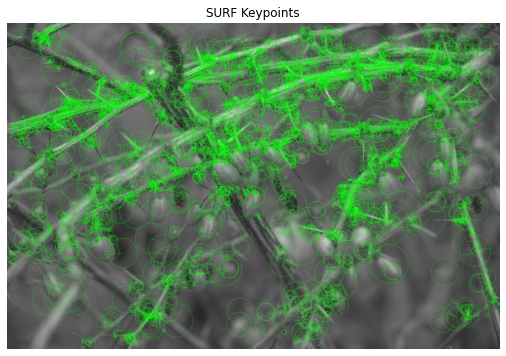

Number of keypoints detected: 4872
Descriptor shape: (4872, 64)


In [1]:
import cv2
import matplotlib.pyplot as plt

# Check if SURF is available in your OpenCV installation
if not hasattr(cv2, 'xfeatures2d') or not hasattr(cv2.xfeatures2d, 'SURF_create'):
    print("Error: SURF is not available in your OpenCV installation. "
          "Ensure OpenCV is compiled with the 'contrib' module.")
    exit()

# Load the input image
image_path = "E://1_DATASET//MICC//MICC_F600//_r30_s1200berries.png"  # Replace with the path to your image
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to load image. Check the path and try again.")
    exit()

# Initialize the SURF detector
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# Detect keypoints and compute descriptors
keypoints, descriptors = surf.detectAndCompute(image, None)

# Draw the detected keypoints on the image
keypoints_image = cv2.drawKeypoints(
    image, keypoints, None, color=(0, 255, 0), flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS
)

# Display the image with keypoints
plt.figure(figsize=(10, 6))
plt.title("SURF Keypoints")
plt.imshow(keypoints_image, cmap="gray")
plt.axis("off")
plt.show()

# Print the results
print(f"Number of keypoints detected: {len(keypoints)}")
if descriptors is not None:
    print(f"Descriptor shape: {descriptors.shape}")
else:
    print("No descriptors computed.")

In [4]:
print(descriptors[1])

[-2.53484305e-03 -9.34052514e-04  3.36054736e-03  1.84151286e-03
  1.24413026e-02  5.68851409e-03  2.97161713e-02  4.20451835e-02
 -7.82842282e-03 -1.79174356e-02  2.94331945e-02  3.53718810e-02
 -5.24449133e-05 -6.98196818e-04  5.15633554e-04  1.47590961e-03
 -1.27795655e-02 -7.83773430e-04  4.11548428e-02  3.71935777e-02
  1.89169273e-01  1.33773088e-01  3.04294974e-01  2.97484934e-01
 -2.00134888e-01  1.86134532e-01  2.86484718e-01  2.37706155e-01
  1.91984307e-02  1.15983852e-03  2.87986044e-02  3.13308649e-02
 -4.72117768e-04  5.19141089e-03  5.40009513e-02  2.31460799e-02
  2.16075122e-01 -6.41215518e-02  3.51670027e-01  3.38252515e-01
 -2.31841892e-01 -1.85190186e-01  2.99238771e-01  2.53359675e-01
  2.56374595e-03  7.86670297e-03  2.43595764e-02  2.85796244e-02
  3.97463283e-03  1.10140117e-03  4.08362504e-03  1.84746936e-03
 -1.41901104e-02 -1.11349104e-02  2.41267160e-02  6.04125448e-02
 -1.13409199e-02  1.29111647e-03  2.31190436e-02  1.45535115e-02
  2.41762679e-03  1.49984

In [5]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors, descriptors)

In [6]:
matches = sorted(matches, key=lambda x: x.distance)

In [ ]:
output_img = cv2.drawMatches(image, keypoints, image, keypoints, matches[:50], None)
cv2.imshow("Matched Keypoints", output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()